In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('Cancer_final_encoded.csv')

In [3]:
df.head()

,tobacco_smoking_status,updated_datetime,exposure_id,pack_years_smoked,case_id,project_id,submitter_id,ajcc_pathologic_t,morphology,ajcc_pathologic_stage,...,morphology_encoded,ajcc_pathologic_stage_encoded,ajcc_pathologic_n_encoded,ajcc_pathologic_m_encoded,primary_diagnosis_encoded,site_of_resection_or_biopsy_encoded,tumor_grade_encoded,ethnicity_encoded,tissue_or_organ_of_origin_encoded,vital_status_encoded
0,0,2023-04-11T15:36:00.631445-05:00,86ea7da9-9bed-4670-927f-383841238593,43,01207379-6f10-48b0-8e90-eff541db27c5,APOLLO-LUAD,AP-9UHJ,T2a,8140/3,Stage IIA,...,0,0,0,0,0,0,0,0,0,0
1,0,2023-04-11T15:36:00.631445-05:00,76645e3b-172c-40fb-9f87-4d92e3b2422b,40,0819cbd2-864e-4b5f-8b57-923825d0b415,APOLLO-LUAD,AP-WTXJ,T2a,8230/3,Stage IIIA,...,1,1,1,0,1,1,0,0,0,0
2,0,2023-04-11T15:36:00.631445-05:00,76645e3b-172c-40fb-9f87-4d92e3b2422b,48,0819cbd2-864e-4b5f-8b57-923825d0b415,APOLLO-LUAD,AP-WTXJ,T2a,8230/3,Stage IIIA,...,1,1,1,0,1,1,0,0,0,0
3,1,2023-04-11T15:36:00.631445-05:00,7322dfc4-86e8-4809-8deb-da845198338a,37,08a97986-e6ec-4588-b68d-e2746268378e,APOLLO-LUAD,AP-3FY5,T3,8230/3,Stage IIB,...,1,2,2,0,1,0,0,0,0,0
4,0,2023-04-11T15:36:00.631445-05:00,78f96127-d9ac-4f6a-aed9-bdb1efd4c149,33,0df89c20-b15e-4f26-8f48-e4404743eb85,APOLLO-LUAD,AP-KX5B,T2a,8550/3,Stage IIA,...,2,0,0,0,2,1,1,0,0,0


In [4]:
print("\nDimensions of the dataset:")
print(df.shape)
print(df.describe())


Dimensions of the dataset:
(21416, 40)
       tobacco_smoking_status  pack_years_smoked           Age  \
count            21416.000000       21416.000000  21416.000000   
mean                 1.000607          25.516997     64.208162   
std                  0.818277          14.461181     18.817518   
min                  0.000000           1.000000     11.000000   
25%                  0.000000          13.000000     51.000000   
50%                  1.000000          26.000000     66.000000   
75%                  2.000000          38.000000     80.000000   
max                  2.000000          50.000000     93.000000   

       gender_encoded  race_encoded  ajcc_pathologic_t_encoded  \
count    21416.000000  21416.000000               21416.000000   
mean         0.514008      0.469229                   9.233657   
std          0.500562      0.936203                   7.401569   
min          0.000000      0.000000                   0.000000   
25%          0.000000      0.000000

C:\Users\Solution 02\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Solution 02\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


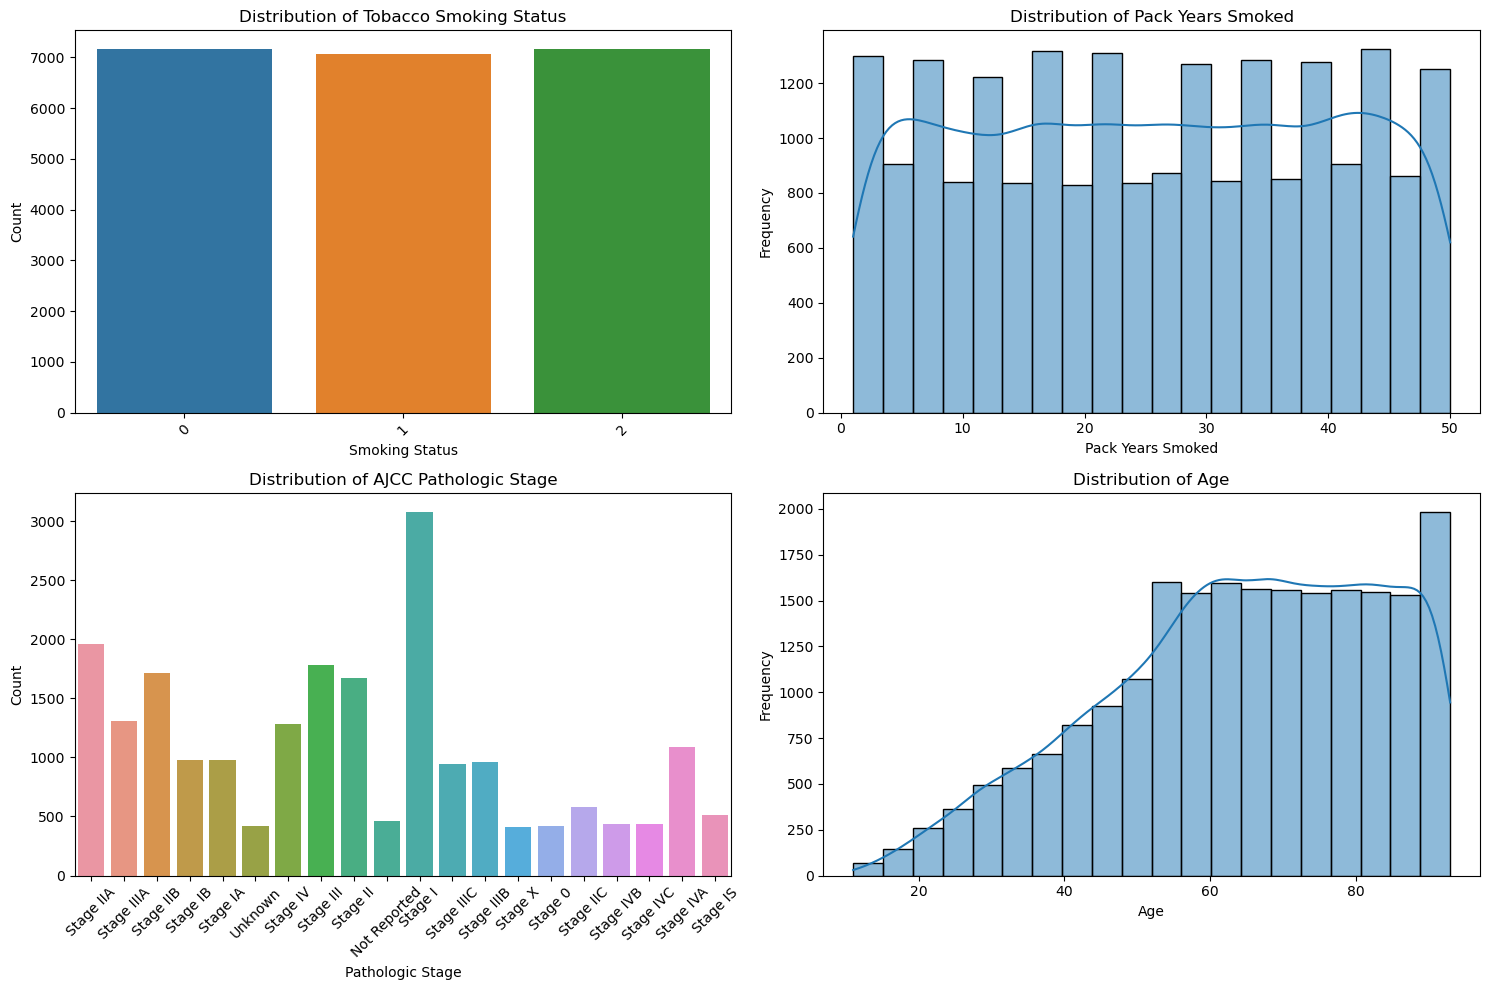

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of tobacco_smoking_status
sns.countplot(data=df, x='tobacco_smoking_status', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Tobacco Smoking Status')
axes[0, 0].set_xlabel('Smoking Status')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Distribution of pack_years_smoked
sns.histplot(data=df, x='pack_years_smoked', bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Pack Years Smoked')
axes[0, 1].set_xlabel('Pack Years Smoked')
axes[0, 1].set_ylabel('Frequency')

# Distribution of ajcc_pathologic_stage
sns.countplot(data=df, x='ajcc_pathologic_stage', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of AJCC Pathologic Stage')
axes[1, 0].set_xlabel('Pathologic Stage')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Distribution of Age
sns.histplot(data=df, x='Age', bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Age')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


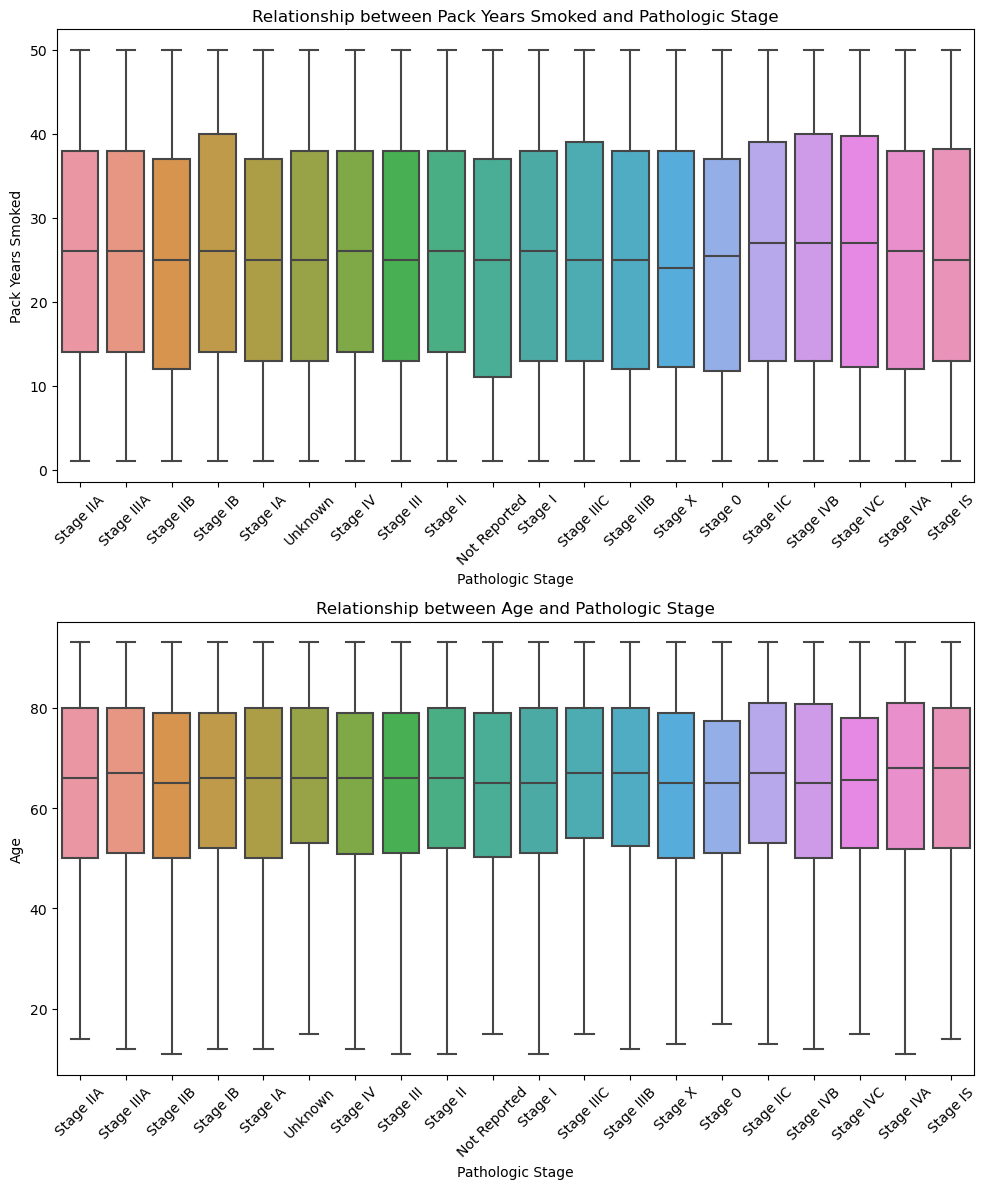

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Relationship between Pack Years Smoked and Pathologic Stage
sns.boxplot(data=df, x='ajcc_pathologic_stage', y='pack_years_smoked', ax=axes[0])
axes[0].set_title('Relationship between Pack Years Smoked and Pathologic Stage')
axes[0].set_xlabel('Pathologic Stage')
axes[0].set_ylabel('Pack Years Smoked')
axes[0].tick_params(axis='x', rotation=45)

# Relationship between Age and Pathologic Stage
sns.boxplot(data=df, x='ajcc_pathologic_stage', y='Age', ax=axes[1])
axes[1].set_title('Relationship between Age and Pathologic Stage')
axes[1].set_xlabel('Pathologic Stage')
axes[1].set_ylabel('Age')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [7]:
columns_to_drop = ['updated_datetime','exposure_id','case_id','submitter_id','project_id','ajcc_pathologic_t','morphology','ajcc_pathologic_stage','ajcc_pathologic_n','ajcc_pathologic_m','tissue_or_organ_of_origin','primary_diagnosis','diagnosis_id','site_of_resection_or_biopsy','tumor_grade','treatment_intent_type','treatment_id','treatment_type','demographic_id','ethnicity','gender','race','vital_status']

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
df.head()

,tobacco_smoking_status,pack_years_smoked,Age,gender_encoded,race_encoded,ajcc_pathologic_t_encoded,cancer_type_encoded,morphology_encoded,ajcc_pathologic_stage_encoded,ajcc_pathologic_n_encoded,ajcc_pathologic_m_encoded,primary_diagnosis_encoded,site_of_resection_or_biopsy_encoded,tumor_grade_encoded,ethnicity_encoded,tissue_or_organ_of_origin_encoded,vital_status_encoded
0,0,43,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,40,90,0,0,0,0,1,1,1,0,1,1,0,0,0,0
2,0,48,72,0,0,0,0,1,1,1,0,1,1,0,0,0,0
3,1,37,85,1,1,1,0,1,2,2,0,1,0,0,0,0,0
4,0,33,67,0,0,0,0,2,0,0,0,2,1,1,0,0,0


In [9]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   tobacco_smoking_status  pack_years_smoked  Age  gender_encoded  \
0                       0                 43   68               0   
1                       0                 40   90               0   
2                       0                 48   72               0   
3                       1                 37   85               1   
4                       0                 33   67               0   

   race_encoded  ajcc_pathologic_t_encoded  cancer_type_encoded  \
0             0                          0                    0   
1             0                          0                    0   
2             0                          0                    0   
3             1                          1                    0   
4             0                          0                    0   

   morphology_encoded  ajcc_pathologic_stage_encoded  \
0                   0                              0   
1                   1                  

In [10]:
df.corr().T

,tobacco_smoking_status,pack_years_smoked,Age,gender_encoded,race_encoded,ajcc_pathologic_t_encoded,cancer_type_encoded,morphology_encoded,ajcc_pathologic_stage_encoded,ajcc_pathologic_n_encoded,ajcc_pathologic_m_encoded,primary_diagnosis_encoded,site_of_resection_or_biopsy_encoded,tumor_grade_encoded,ethnicity_encoded,tissue_or_organ_of_origin_encoded,vital_status_encoded
tobacco_smoking_status,1.000000,0.005092,0.009314,0.006991,-0.005980,0.009653,0.011750,0.006309,0.005833,-0.003175,0.000042,0.006301,0.016904,0.029213,0.013810,0.016068,0.006816
pack_years_smoked,0.005092,1.000000,0.388197,-0.004207,-0.007972,-0.007428,-0.007419,-0.009398,0.000173,-0.004205,-0.000637,-0.009399,-0.006233,-0.020088,0.000272,-0.007111,0.000276
Age,0.009314,0.388197,1.000000,-0.000334,-0.008826,-0.008646,-0.001923,-0.000164,0.009886,-0.001520,-0.001520,-0.000149,-0.000377,-0.007031,0.004656,0.000950,0.002153
gender_encoded,0.006991,-0.004207,-0.000334,1.000000,0.004258,0.081747,-0.054955,0.021422,-0.055161,0.179105,0.034062,0.021409,-0.040474,0.005100,-0.019437,-0.093112,0.036405
race_encoded,-0.005980,-0.007972,-0.008826,0.004258,1.000000,-0.048055,-0.004520,-0.057558,-0.061126,-0.088772,-0.113924,-0.057553,-0.092880,0.024416,-0.192472,-0.115582,0.098383
ajcc_pathologic_t_encoded,0.009653,-0.007428,-0.008646,0.081747,-0.048055,1.000000,0.037568,0.166764,0.131642,0.152670,0.193084,0.166761,0.066120,0.064677,0.063039,0.035735,0.006181
cancer_type_encoded,0.011750,-0.007419,-0.001923,-0.054955,-0.004520,0.037568,1.000000,0.516140,0.140695,0.076386,0.164558,0.516137,0.645833,0.099179,0.005656,0.712382,0.079423
morphology_encoded,0.006309,-0.009398,-0.000164,0.021422,-0.057558,0.166764,0.516140,1.000000,0.136094,0.170280,0.154218,0.999999,0.377682,0.061299,0.061389,0.382875,-0.067846
ajcc_pathologic_stage_encoded,0.005833,0.000173,0.009886,-0.055161,-0.061126,0.131642,0.140695,0.136094,1.000000,0.169202,0.196140,0.136083,0.193258,0.065311,0.049215,0.132558,-0.018620
ajcc_pathologic_n_encoded,-0.003175,-0.004205,-0.001520,0.179105,-0.088772,0.152670,0.076386,0.170280,0.169202,1.000000,0.266553,0.170289,0.148498,0.043093,0.055259,0.103433,-0.045989


In [11]:
X = df.drop(columns=['cancer_type_encoded'])  # Features
y = df['cancer_type_encoded']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00       149
           2       1.00      1.00      1.00       422
           3       1.00      1.00      1.00       141
           4       1.00      1.00      1.00        13
           5       0.98      0.99      0.99       197
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        77
           8       1.00      1.00      1.00       254
           9       1.00      1.00      1.00       206
          10       1.00      1.00      1.00        48
          11       1.00      1.00      1.00       212
          12       1.00      1.00      1.00       116
          13       1.00      1.00      1.00        83
          14       1.00      1.00      1.00       210
          15       0.99      1.00      1.00       150
          16       1.00      1.00      1.00       177
    

In [12]:
score = rf_classifier.score(X_test, y_test)
print("Score:", score)

Score: 0.9985994397759104


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='rbf', random_state=42)

svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.91      1.00      0.95       149
           2       1.00      0.99      1.00       422
           3       0.90      1.00      0.95       141
           4       0.00      0.00      0.00        13
           5       0.85      0.99      0.92       197
           6       1.00      0.95      0.97        19
           7       0.68      0.96      0.80        77
           8       0.98      1.00      0.99       254
           9       1.00      1.00      1.00       206
          10       0.00      0.00      0.00        48
          11       0.73      1.00      0.85       212
          12       1.00      1.00      1.00       116
          13       0.00      0.00      0.00        83
          14       0.77      0.97      0.86       210
          15       1.00      1.00      1.00       150
          16       1.00      0.99      0.99       177
    

C:\Users\Solution 02\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Solution 02\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Solution 02\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
score = svm_classifier.score(X_test, y_test)
print("Score:", score)

Score: 0.919000933706816


In [15]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_classifier = DecisionTreeClassifier(random_state=42)

tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00       149
           2       1.00      1.00      1.00       422
           3       1.00      1.00      1.00       141
           4       1.00      1.00      1.00        13
           5       0.98      0.97      0.98       197
           6       0.95      1.00      0.97        19
           7       0.99      1.00      0.99        77
           8       1.00      1.00      1.00       254
           9       1.00      1.00      1.00       206
          10       1.00      1.00      1.00        48
          11       1.00      1.00      1.00       212
          12       1.00      1.00      1.00       116
          13       1.00      1.00      1.00        83
          14       1.00      1.00      1.00       210
          15       1.00      1.00      1.00       150
          16       1.00      1.00      1.00       177
    

In [16]:
score = tree_classifier.score(X_test, y_test)
print("Score:", score)

Score: 0.9974323062558357


In [17]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=0.1, random_state=42)  # You can adjust the alpha value for regularization strength

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 31.778883009766943
R^2 Score: 0.5979991374746391
